In [1]:
import sys
print('python : {}' .format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import pandas 
print('pandas: {}'.format(pandas.__version__))

import seaborn
print('seaborn: {}'.format(seaborn.__version__))

import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))   

import sklearn 
print('sklearn: {}' .format(sklearn.__version__))
      

python : 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
scipy: 1.13.1
numpy: 1.26.4
pandas: 2.2.2
seaborn: 0.13.2
matplotlib: 3.9.0
sklearn: 1.5.0


In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as mlt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.linear_mode import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_anaysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import svc

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal_length','petal_length','sepal_width','petal_width','class']

In [4]:
dataset = pd.read_csv(url,names = names)

In [5]:
dataset.head()

,sepal_length,petal_length,sepal_width,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print(dataset.shape)

(150, 5)


In [7]:
print(dataset.head(30))

    sepal_length  petal_length  sepal_width  petal_width        class
0            5.1           3.5          1.4          0.2  Iris-setosa
1            4.9           3.0          1.4          0.2  Iris-setosa
2            4.7           3.2          1.3          0.2  Iris-setosa
3            4.6           3.1          1.5          0.2  Iris-setosa
4            5.0           3.6          1.4          0.2  Iris-setosa
5            5.4           3.9          1.7          0.4  Iris-setosa
6            4.6           3.4          1.4          0.3  Iris-setosa
7            5.0           3.4          1.5          0.2  Iris-setosa
8            4.4           2.9          1.4          0.2  Iris-setosa
9            4.9           3.1          1.5          0.1  Iris-setosa
10           5.4           3.7          1.5          0.2  Iris-setosa
11           4.8           3.4          1.6          0.2  Iris-setosa
12           4.8           3.0          1.4          0.1  Iris-setosa
13           4.3    

In [8]:
print(dataset.describe())

       sepal_length  petal_length  sepal_width  petal_width
count    150.000000    150.000000   150.000000   150.000000
mean       5.843333      3.054000     3.758667     1.198667
std        0.828066      0.433594     1.764420     0.763161
min        4.300000      2.000000     1.000000     0.100000
25%        5.100000      2.800000     1.600000     0.300000
50%        5.800000      3.000000     4.350000     1.300000
75%        6.400000      3.300000     5.100000     1.800000
max        7.900000      4.400000     6.900000     2.500000


In [9]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


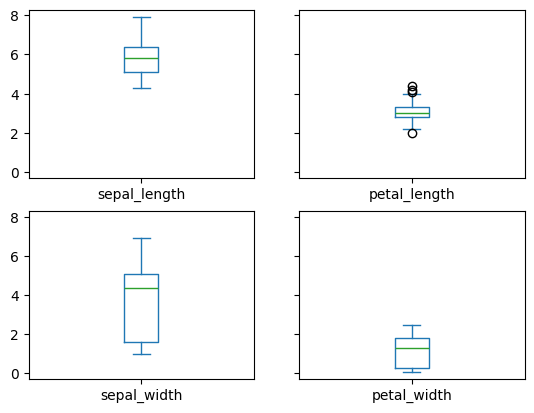

In [10]:
dataset.plot(kind='box' , subplots = True , layout = [2,2] , sharex = True , sharey =  True)
mlt.show()

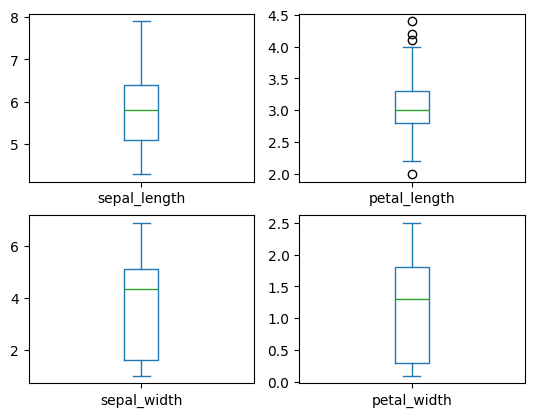

In [11]:
dataset.plot(kind='box' , subplots = True , layout = [2,2] , sharex = False , sharey =  False)
mlt.show()

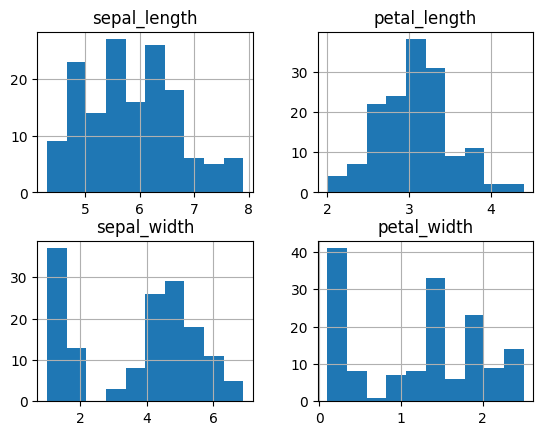

In [12]:
dataset.hist()
mlt.show()

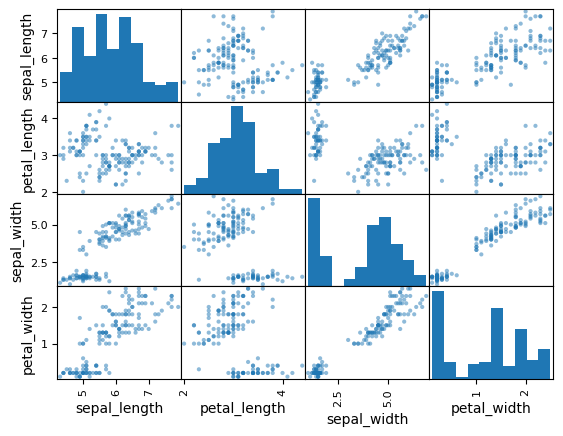

In [13]:
scatter_matrix(dataset)
mlt.show()

In [14]:
array = dataset.values
x = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 6
x_train , x_test , y_train , y_test = model_selection.train_test_split(x,y,test_size = validation_size , random_state = seed)

In [15]:
seed = 6
scoring = 'accuracy'


In [16]:
models = []
#models.append(('LR' , LogisticRegression()))
#models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
#models.append(('SVM' , SVC()))

result = []


names = []
for name , model in models:
    #kfold = model_selection.KFold(n_splits = 10 , random_state = 6)
    cv_results = model_selection.cross_val_score(model, x_train , y_train  , scoring = scoring)
    result.append(cv_results)
    names.append(name)
    msg = "%s  :  %f  (%f)" % (name , cv_results.mean() , cv_results.std())
    print(msg)
    

KNN  :  0.966667  (0.031180)
CART  :  0.941667  (0.042492)
NB  :  0.966667  (0.031180)
